**Introduction**

Creating a generative AI algorithm for generating beautiful and thought-provoking art is a complex task that often involves deep learning models. One popular approach for this is using Generative Adversarial Networks (GANs). GANs consist of a generator and a discriminator, where the generator creates new data (in this case, images) and the discriminator evaluates how realistic the generated data is.

For this example, I used a simple GAN implementation in TensorFlow to generate abstract art.

**Task**

Generate abstract art that is both beautiful and thought-provoking.

**Generative AI algorithm**

Generative Adversarial Network (GAN)

**Code**

The developed code is a basic GAN implementation using TensorFlow and Keras. It generates abstract art images by training a generator to create images that can fool a discriminator. The generator and discriminator are neural networks, and the GAN is trained in a loop over epochs.

**Output**

The output of this code is a series of generated images saved at specified intervals during training (after every 5000 epochs). These images exhibit abstract and potentially thought-provoking patterns and colors.

**How the output meets the objectives of the task**

The objective is to create art that is both beautiful and thought-provoking. The GAN is designed to learn patterns from a given dataset (or a random noise distribution) and generate novel images that resemble the training data. The generator's objective is to create images that can convince the discriminator they are real, leading to the generation of visually appealing and abstract art.

In [ ]:
# Import libraries
import tensorflow as tf
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
# Define the generator model
def build_generator(latent_dim):
    model = tf.keras.Sequential()
    model.add(layers.Dense(256, input_dim=latent_dim, activation='relu'))
    model.add(layers.Dense(512, activation='relu'))
    model.add(layers.Dense(64 * 64 * 3, activation='tanh'))  # Adjusted output size
    model.add(layers.Reshape((64, 64, 3)))  # Reshape to match img_shape
    return model

In [ ]:
# Define the discriminator model
def build_discriminator(img_shape):
    model = tf.keras.Sequential()
    model.add(layers.Flatten(input_shape=img_shape))
    model.add(layers.Dense(512, activation='relu'))
    model.add(layers.Dense(1, activation='sigmoid'))
    return model

In [ ]:
# Combine the generator and discriminator into a GAN model
def build_gan(generator, discriminator):
    discriminator.trainable = False
    model = tf.keras.Sequential()
    model.add(generator)
    model.add(discriminator)
    return model

In [ ]:
# Define hyperparameters
latent_dim = 100
img_shape = (64, 64, 3)  # Adjust the size as needed

In [ ]:
# Build and compile the discriminator
discriminator = build_discriminator(img_shape)
discriminator.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
# Build the generator
generator = build_generator(latent_dim)

In [ ]:
# Build the GAN model using the functional API
discriminator.trainable = False

In [ ]:
# Define the input shape for the generator
noise = tf.keras.Input(shape=(latent_dim,))

In [ ]:
# Generate images using the generator
generated_image = generator(noise)

In [ ]:
# Make sure the discriminator is not trainable during GAN training
discriminator.trainable = False

In [ ]:
# Define the input shape for the discriminator (adjust based on your actual image shape)
real_image = tf.keras.Input(shape=img_shape)  # Input for real images

In [ ]:
# Get the discriminator's decision on real images
validity_real = discriminator(real_image)

In [ ]:
# Get the discriminator's decision on generated images
validity_generated = discriminator(generated_image)

In [ ]:
# Create the GAN model
gan = tf.keras.Model(inputs=noise, outputs=validity_generated)

In [ ]:
# Compile the GAN model
gan.compile(loss='binary_crossentropy', optimizer='adam')

In [ ]:
# Function to train the GAN
def train_gan(epochs, batch_size):
    for epoch in range(epochs):
        # Sample random noise for the generator
        noise = np.random.normal(0, 1, (batch_size, latent_dim))

        # Generate fake images using the generator
        gen_imgs = generator.predict(noise)

        # Labels for the generated images (pretend they are real)
        labels_gen = np.ones((batch_size, 1))

        # Train the generator to fool the discriminator
        g_loss = gan.train_on_batch(noise, labels_gen)

        # Print the progress
        print(f"Epoch {epoch}/{epochs} [G loss: {g_loss}]")

        # Optionally, save generated images at certain intervals
        if epoch % save_interval == 0:
            save_generated_images(epoch)

In [ ]:
# Function to save generated images
def save_generated_images(epoch, examples=10, dim=(1, 10), figsize=(10, 1)):
    noise = np.random.normal(0, 1, (examples, latent_dim))
    generated_images = generator.predict(noise)

    generated_images = 0.5 * generated_images + 0.5  # Rescale to 0-1 range

    fig, axs = plt.subplots(dim[0], dim[1], figsize=figsize)
    for i in range(dim[0] * dim[1]):
        axs[i].imshow(generated_images[i], interpolation='nearest')
        axs[i].axis('off')

    plt.tight_layout()
    plt.savefig(f"gan_generated_image_epoch_{epoch}.png")
    plt.show()

In [ ]:
# Set hyperparameters
epochs = 20000  # Adjust as needed
batch_size = 64
save_interval = 5000  # Save generated images every 'save_interval' epochs

Streaming output truncated to the last 5000 lines.
2/2 [==============================] - 0s 16ms/step
Epoch 2502/20000 [G loss: 1.7872000208323243e-18]
2/2 [==============================] - 0s 17ms/step
Epoch 2503/20000 [G loss: 4.822375703629527e-18]
2/2 [==============================] - 0s 20ms/step
Epoch 2504/20000 [G loss: 3.3039092930228178e-18]
2/2 [==============================] - 0s 16ms/step
Epoch 2505/20000 [G loss: 1.1120844457011969e-17]
2/2 [==============================] - 0s 18ms/step
Epoch 2506/20000 [G loss: 8.888239315978269e-18]
2/2 [==============================] - 0s 16ms/step
Epoch 2507/20000 [G loss: 1.125251506691816e-17]
2/2 [==============================] - 0s 15ms/step
Epoch 2508/20000 [G loss: 2.520028483609644e-18]
2/2 [==============================] - 0s 17ms/step
Epoch 2509/20000 [G loss: 3.7788095231982413e-17]
2/2 [==============================] - 0s 16ms/step
Epoch 2510/20000 [G loss: 7.565859585094858e-18]
2/2 [==============================]

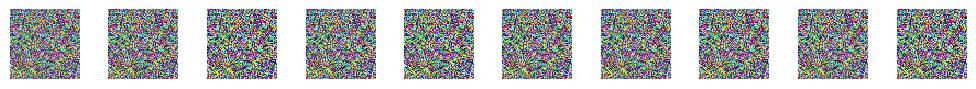

Streaming output truncated to the last 5000 lines.
Epoch 7500/20000 [G loss: 6.174603419736301e-19]
2/2 [==============================] - 0s 17ms/step
Epoch 7501/20000 [G loss: 7.152678733221558e-18]
2/2 [==============================] - 0s 15ms/step
Epoch 7502/20000 [G loss: 3.060537660763538e-18]
2/2 [==============================] - 0s 16ms/step
Epoch 7503/20000 [G loss: 1.036789503262945e-17]
2/2 [==============================] - 0s 15ms/step
Epoch 7504/20000 [G loss: 7.3257017563105e-18]
2/2 [==============================] - 0s 14ms/step
Epoch 7505/20000 [G loss: 5.785422799745921e-18]
2/2 [==============================] - 0s 16ms/step
Epoch 7506/20000 [G loss: 2.067457911352028e-18]
2/2 [==============================] - 0s 15ms/step
Epoch 7507/20000 [G loss: 3.1866918031646127e-18]
2/2 [==============================] - 0s 15ms/step
Epoch 7508/20000 [G loss: 3.3036543145989983e-18]
2/2 [==============================] - 0s 15ms/step
Epoch 7509/20000 [G loss: 4.820708521104

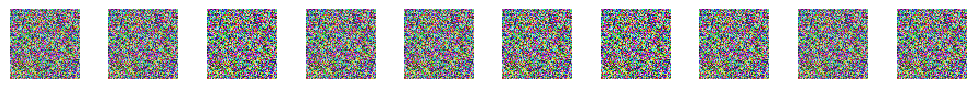

Streaming output truncated to the last 5000 lines.
2/2 [==============================] - 0s 17ms/step
Epoch 12502/20000 [G loss: 8.869351473871233e-18]
2/2 [==============================] - 0s 19ms/step
Epoch 12503/20000 [G loss: 7.54942350632343e-18]
2/2 [==============================] - 0s 17ms/step
Epoch 12504/20000 [G loss: 2.395159531726293e-17]
2/2 [==============================] - 0s 16ms/step
Epoch 12505/20000 [G loss: 1.5300442508454608e-18]
2/2 [==============================] - 0s 16ms/step
Epoch 12506/20000 [G loss: 1.4304612176711206e-18]
2/2 [==============================] - 0s 18ms/step
Epoch 12507/20000 [G loss: 1.1718677664206094e-17]
2/2 [==============================] - 0s 18ms/step
Epoch 12508/20000 [G loss: 1.2363746606689753e-18]
2/2 [==============================] - 0s 21ms/step
Epoch 12509/20000 [G loss: 6.195567898771151e-18]
2/2 [==============================] - 0s 15ms/step
Epoch 12510/20000 [G loss: 1.4302529749519104e-18]
2/2 [======================

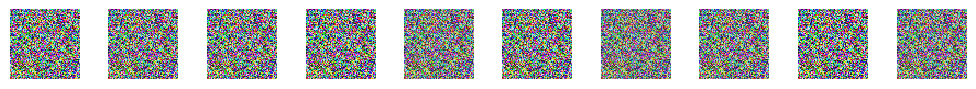

Streaming output truncated to the last 5000 lines.
2/2 [==============================] - 0s 16ms/step
Epoch 17502/20000 [G loss: 5.528365340174859e-17]
2/2 [==============================] - 0s 16ms/step
Epoch 17503/20000 [G loss: 3.2847437250251173e-18]
2/2 [==============================] - 0s 16ms/step
Epoch 17504/20000 [G loss: 8.472607527949974e-18]
2/2 [==============================] - 0s 16ms/step
Epoch 17505/20000 [G loss: 7.351651073870779e-17]
2/2 [==============================] - 0s 14ms/step
Epoch 17506/20000 [G loss: 6.6316860554402406e-18]
2/2 [==============================] - 0s 16ms/step
Epoch 17507/20000 [G loss: 2.4759507584627146e-17]
2/2 [==============================] - 0s 15ms/step
Epoch 17508/20000 [G loss: 9.733424341744126e-18]
2/2 [==============================] - 0s 15ms/step
Epoch 17509/20000 [G loss: 1.872672552168398e-17]
2/2 [==============================] - 0s 30ms/step
Epoch 17510/20000 [G loss: 3.6762321789245205e-18]
2/2 [======================

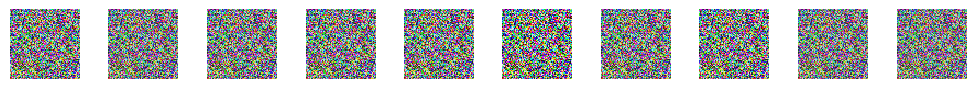

2/2 [==============================] - 0s 16ms/step
Epoch 1/20000 [G loss: 1.1938697780977848e-18]
2/2 [==============================] - 0s 13ms/step
Epoch 2/20000 [G loss: 1.4489435344828524e-18]
2/2 [==============================] - 0s 13ms/step
Epoch 3/20000 [G loss: 4.508871769930092e-18]
2/2 [==============================] - 0s 14ms/step
Epoch 4/20000 [G loss: 3.1069790958698683e-18]
2/2 [==============================] - 0s 13ms/step
Epoch 5/20000 [G loss: 5.555639470204203e-18]
2/2 [==============================] - 0s 12ms/step
Epoch 6/20000 [G loss: 5.719928293205197e-18]
2/2 [==============================] - 0s 12ms/step
Epoch 7/20000 [G loss: 2.9091327961885163e-18]
2/2 [==============================] - 0s 13ms/step
Epoch 8/20000 [G loss: 1.2963025312004315e-17]
2/2 [==============================] - 0s 13ms/step
Epoch 9/20000 [G loss: 3.073958666202211e-17]
2/2 [==============================] - 0s 15ms/step
Epoch 10/20000 [G loss: 3.858626331173076e-18]
2/2 [=========

In [ ]:
# Train the GAN
train_gan(epochs, batch_size)